In [2]:
%load_ext autoreload
%autoreload 2

In [29]:
import os
from pathlib import Path

import numpy as np
import torch
import torch as tr
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision as tv
from torchvision.transforms import v2
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

%matplotlib inline

In [43]:
from impl.arch import *

In [25]:
import impl.retinal_dataset as rd

transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((224, 224)),
])

train_dataset = rd.RetinalDataset(transform=transform)

100%|█████████████████████████████| 512/512 [00:51<00:00,  9.97it/s]


In [26]:
train_dataloader = DataLoader(train_dataset, batch_size=128)

<Axes: >

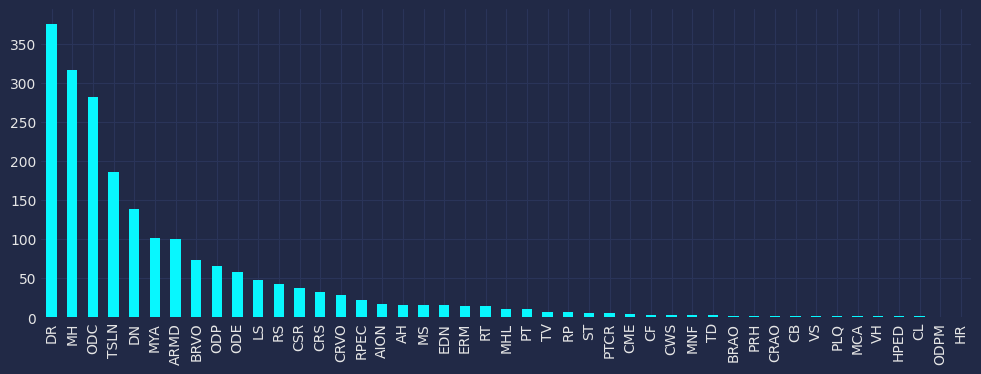

In [28]:
plt.figure(figsize=(12,4))
disease_counts = train_dataset.labels_df.iloc[:, 2:].sum().sort_values(ascending=False)
disease_counts.plot.bar()

In [44]:
model = Model1()

In [46]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

In [53]:
images, labels = next(iter(train_dataloader))